# Using Random Forest Classifier with MediaPipe

In [66]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [67]:
data_dict = pickle.load(open(r'C:\Users\PC\Desktop\RAIN\Semester 3\Image_classification\alphabets_2\alphabets\A_Z\data.pickle', 'rb'))

In [68]:
len(data_dict['labels'])

18200

In [69]:
# data_dict['data'] is a list of lists
data = data_dict['data']

# Find the maximum length of sequences
max_length = max(len(seq) for seq in data)

In [70]:
# Pad sequences to the maximum length
data_padded = [seq + [0] * (max_length - len(seq)) for seq in data]

# Convert to NumPy array
data_array = np.array(data_padded)

In [71]:
data_array.shape

(18200, 84)

In [72]:
labels = np.array(data_dict['labels'])

In [73]:
labels.shape

(18200,)

In [74]:
#split into train and test
x_train, x_test, y_train, y_test = train_test_split(data_array, labels, test_size=0.2, random_state=42, shuffle=True, stratify=labels)

from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [75]:
# Create and train the model
model = RandomForestClassifier()

In [76]:
model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [77]:
# Predict on the test set
y_pred = model.predict(x_test_scaled)
y_pred

array(['L', 'D', 'N', ..., 'D', 'G', 'W'], dtype='<U1')

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
#print("Confusion Matrix:")
#print(conf_matrix)

Accuracy: 0.8585164835164835


In [80]:
# Save the model and scaler
model_and_scaler = {'model': model, 'scaler': scaler}
with open('model_and_scaler.p', 'wb') as f:
    pickle.dump(model_and_scaler, f)

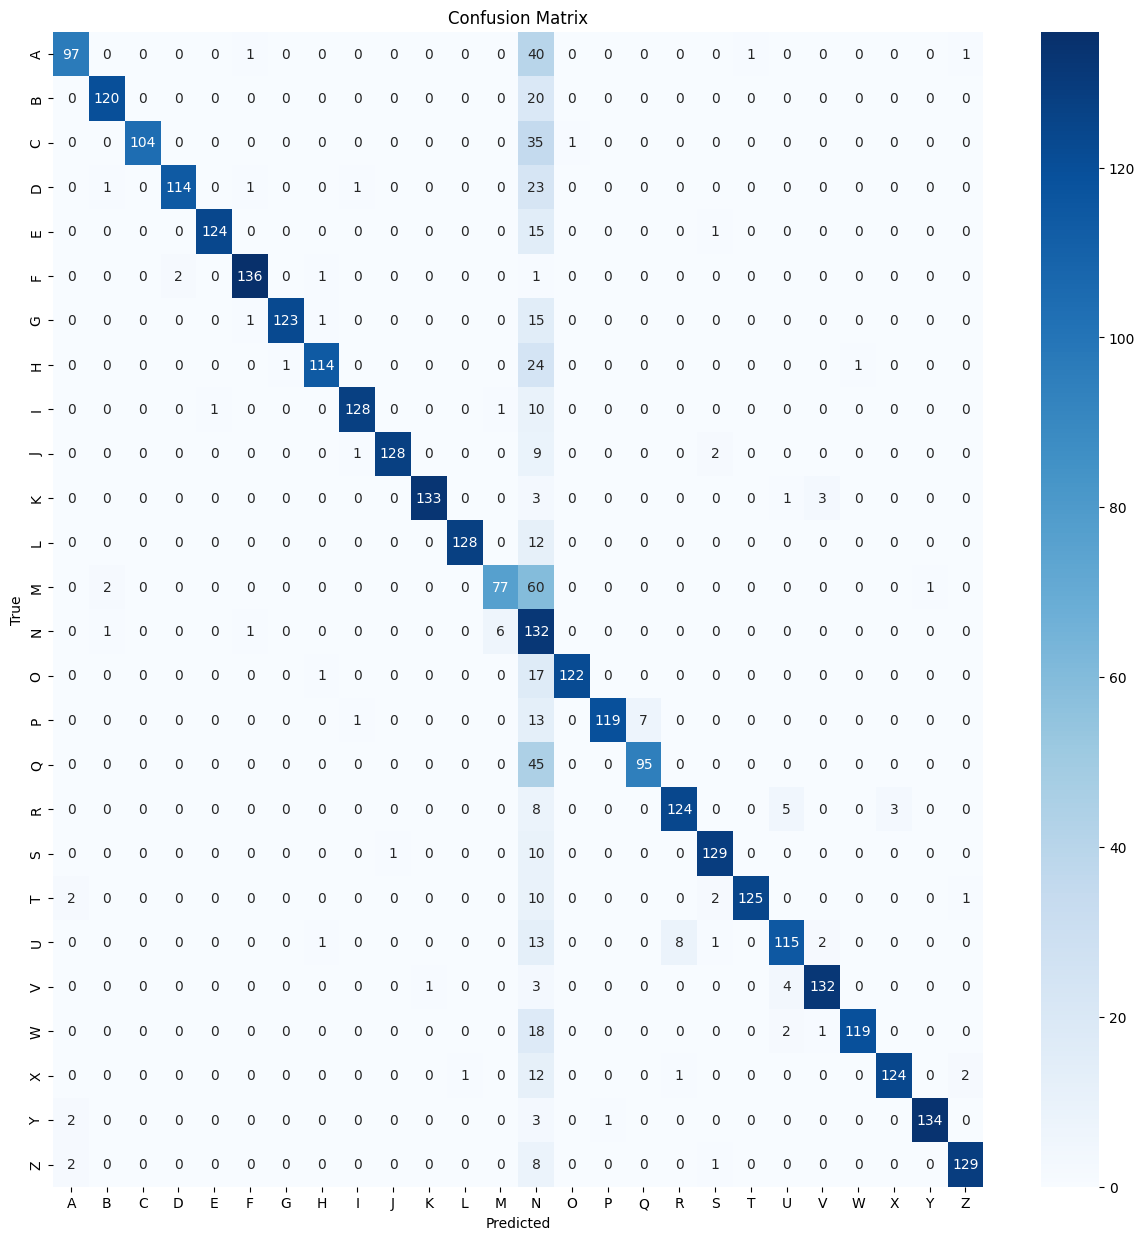

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
# class names
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
               'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Plot the confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
import xgboost as xgb

In [55]:
from xgboost import XGBClassifier

model_1 = XGBClassifier(n_estimators=200)


In [56]:
# Check unique classes in y_train
unique_classes = np.unique(y_train)

# Print unique classes and their data types
for cls in unique_classes:
    print(f"Class: {cls}, Data Type: {type(cls)}")

# Check the data types of features in x_train_scaled
print("Data Types of Features:")
print(x_train_scaled.dtype)


Class: A, Data Type: <class 'numpy.str_'>
Class: B, Data Type: <class 'numpy.str_'>
Class: C, Data Type: <class 'numpy.str_'>
Class: D, Data Type: <class 'numpy.str_'>
Class: E, Data Type: <class 'numpy.str_'>
Class: F, Data Type: <class 'numpy.str_'>
Class: G, Data Type: <class 'numpy.str_'>
Class: H, Data Type: <class 'numpy.str_'>
Class: I, Data Type: <class 'numpy.str_'>
Class: J, Data Type: <class 'numpy.str_'>
Class: K, Data Type: <class 'numpy.str_'>
Class: L, Data Type: <class 'numpy.str_'>
Class: M, Data Type: <class 'numpy.str_'>
Class: N, Data Type: <class 'numpy.str_'>
Class: O, Data Type: <class 'numpy.str_'>
Class: P, Data Type: <class 'numpy.str_'>
Class: Q, Data Type: <class 'numpy.str_'>
Class: R, Data Type: <class 'numpy.str_'>
Class: S, Data Type: <class 'numpy.str_'>
Class: T, Data Type: <class 'numpy.str_'>
Class: U, Data Type: <class 'numpy.str_'>
Class: V, Data Type: <class 'numpy.str_'>
Class: W, Data Type: <class 'numpy.str_'>
Class: X, Data Type: <class 'numpy

In [62]:
import lightgbm as lgb

In [63]:
model = lgb.LGBMClassifier()

In [65]:
model.fit(x_train_scaled,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11382
[LightGBM] [Info] Number of data points in the train set: 14560, number of used features: 84
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.258097
[LightGB

LGBMClassifier()

# Deep Learning 

In [28]:
len(x_train_scaled)

14560

### convert to csv
#### Encoding the labels